In [55]:
import sys
sys.path.insert(0, '../../py3')


In [56]:
from auxilary3 import Helper as hp
import pandas as pd
import numpy as np
%matplotlib inline

In [70]:
file_name = '3_test.csv' 
result_df = pd.read_csv('../../../Data/' + file_name, sep=',', encoding="ISO-8859-1")



In [71]:
print(result_df.shape)
result_df.head()


(4000, 19)


bar_id  bar_product_id      country_id  is_bulk  modifier_id  price  \
0  11817.0       4762317.0   United States      1.0          NaN    8.0   
1  15552.0       4567057.0  United Kingdom      1.0          NaN    3.5   
2  12885.0       3611789.0   United States      1.0          NaN    0.0   
3  13412.0       3511449.0   United States      1.0          NaN   10.0   
4  13482.0       4250969.0   United States      1.0          NaN    8.0   

                   title  units_in_pack                 title_orig  \
0  beer l shipyardpumpkn            1.0     Beer L-ShipyardPumpkn    
1            321975 port            1.0               321975 Port    
2  wood prem breed cajun            1.0  Food Preps Breaded Cajun    
3     wood parti pack ag            1.0        Food Party Package    
4      spirit hh negroni            1.0        Spirits HH NEGRONI    

     country_orig  brand_id  subtype_id  superbrand_id  type_id  type_id_prob  \
0   United States    1288.0        10.0           1086        4      0.934086   
1  United Kingdom    1118.0        34.0           1131        8      0.680430   
2   United States    1540.0        48.0            764        3      0.998989   
3   United States    7293.0        10.0            764        3      0.678915   
4   United States    7446.0        10.0           1086        4      0.999914   

   subtype_id_prob  superbrand_id_prob  brand_id_prob country  
0         0.995122            0.992862       0.465383  Canada  
1         0.860195            0.357714       0.278824  Canada  
2         0.979135            0.980512       0.353822  Canada  
3         0.839609            0.386601       0.709581  Canada  
4         1.000000            1.000000       0.731428  Canada

In [74]:
spirit_column_names = ['type_id', 'superbrand_id']
food_column_names = ['type_id', 'course_id']

column_names = spirit_column_names

countries_df = result_df.country_id.value_counts().reset_index()
countries = countries_df['index']


In [75]:
country_report_df = pd.DataFrame(columns=['country', 'total', 'match', 'coverage'])
for country in countries:
    total_count = result_df[result_df.country_id == country].shape[0]
    over_threshold_df = result_df[result_df.country_id == country]
    for column in column_names:
        over_threshold_df = over_threshold_df[over_threshold_df[column + '_prob'] > 0.85]
    country_report_df = country_report_df.append({'country' : country, 
                              'total' : total_count, 
                              'match' : over_threshold_df.shape[0], 
                              'coverage' : over_threshold_df.shape[0] / total_count}, ignore_index=True)
        

In [76]:
country_report_df.head()


country total match  coverage
0          Canada  1611   823  0.510863
1   United States   838   339  0.404535
2       Australia   593   295  0.497470
3  United Kingdom   571   153  0.267951
4           Korea   159    43  0.270440

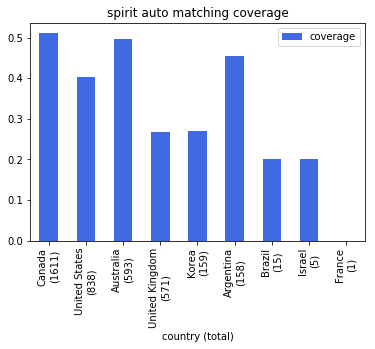

In [85]:
country_report_df['country (total)'] = country_report_df['country'] + '\n(' + country_report_df['total'].astype(str) + ')'
country_report_df.plot.bar(x='country (total)', y='coverage', color='royalblue', title='spirit auto matching coverage')

